In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

In [2]:
# Specify the path to your dataset folder
dataset_folder_path = 'data'

In [3]:
# List files in the dataset folder
files = os.listdir(dataset_folder_path)
print("Files in dataset folder:", files)

Files in dataset folder: ['without_mask', 'with_mask']


In [4]:
with_mask_files = os.listdir('data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])


['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [5]:
without_mask_files = os.listdir('data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [6]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [7]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828


print(with_mask_labels[0:5])

print(without_mask_labels[0:5])


print(len(with_mask_labels))
print(len(without_mask_labels))

labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
3725
3828
7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


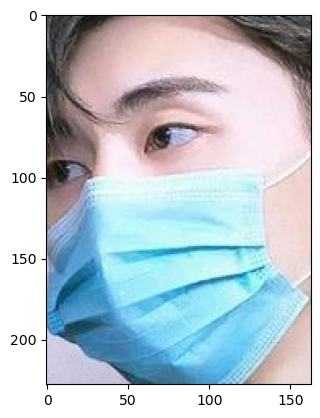

In [8]:
# displaying with mask image
img = mpimg.imread('data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

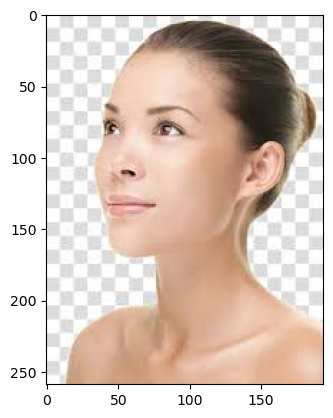

In [9]:
# displaying without mask image
img = mpimg.imread('data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [10]:
# convert images to numpy arrays+

with_mask_path = 'data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

C:\Users\user\anaconda3\ana\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [11]:
type(data)



list

In [12]:
len(data)


7553

In [13]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [14]:

type(data[0])


numpy.ndarray

In [15]:
data[0].shape

(128, 128, 3)

In [16]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

type(X)

numpy.ndarray

In [17]:
type(Y)

numpy.ndarray

In [18]:
print(X.shape)

(7553, 128, 128, 3)


In [19]:
print(Y.shape)


(7553,)


In [20]:
print(Y)

[1 1 1 ... 0 0 0]


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)


(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [22]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255


X_train[0]
X_train_scaled[0]

array([[[0.88235294, 0.92156863, 0.77647059],
        [0.82352941, 0.84705882, 0.72941176],
        [0.74117647, 0.7372549 , 0.6627451 ],
        ...,
        [0.73333333, 0.71372549, 0.64705882],
        [0.70980392, 0.68235294, 0.59215686],
        [0.64705882, 0.71372549, 0.52156863]],

       [[0.87843137, 0.89411765, 0.85098039],
        [0.79215686, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75686275],
        ...,
        [0.77647059, 0.74509804, 0.70588235],
        [0.69411765, 0.6627451 , 0.60392157],
        [0.61960784, 0.71372549, 0.55294118]],

       [[0.80392157, 0.8       , 0.83921569],
        [0.86666667, 0.85882353, 0.89019608],
        [0.76470588, 0.74901961, 0.77254902],
        ...,
        [0.71764706, 0.67843137, 0.68235294],
        [0.68235294, 0.64705882, 0.62745098],
        [0.68235294, 0.79607843, 0.65098039]],

       ...,

       [[0.60784314, 0.69019608, 0.78039216],
        [0.62745098, 0.70588235, 0.77254902],
        [0.64705882, 0

In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


C:\Users\user\anaconda3\ana\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [26]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)


Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 132s 632ms/step - acc: 0.6270 - loss: 1.0090 - val_acc: 0.8843 - val_loss: 0.2843
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 97s 570ms/step - acc: 0.8838 - loss: 0.3087 - val_acc: 0.9140 - val_loss: 0.2389
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 114s 671ms/step - acc: 0.9087 - loss: 0.2384 - val_acc: 0.9174 - val_loss: 0.2382
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 102s 600ms/step - acc: 0.9140 - loss: 0.2263 - val_acc: 0.8959 - val_loss: 0.2574
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 99s 580ms/step - acc: 0.9314 - loss: 0.1722 - val_acc: 0.9339 - val_loss: 0.2089
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 101s 594ms/step - acc: 0.9406 - loss: 0.1636 - val_acc: 0.9388 - val_loss: 0.2187
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 97s 570ms/step - acc: 0.9474 - loss: 0.1412 - val_acc: 0.9405 - val_loss: 0.2426
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 97s 573ms/step - acc: 0.9581 - loss: 0.1201 - val_acc: 0.9322 - val_loss: 0.2402
Epoch 9/10
170/170 ━━━━━━━━━

In [27]:
# Save the model
model.save('face_detection_model.h5')


In [28]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - acc: 0.9354 - loss: 0.2383
Test Accuracy = 0.9364659190177917


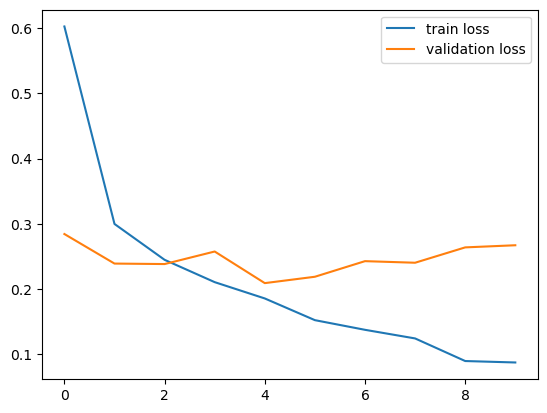

In [29]:

h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

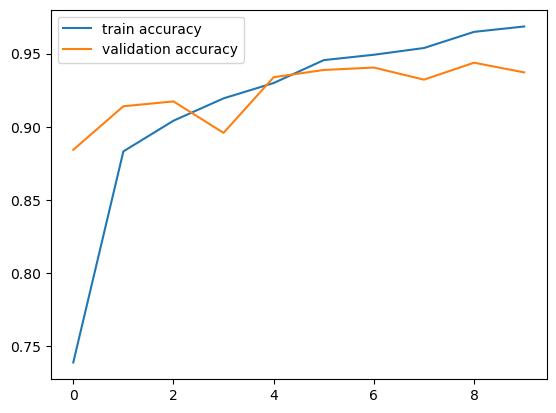

In [30]:
# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()


In [31]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

Path of the image to be predicted: data/without_mask/without_mask_10.jpg


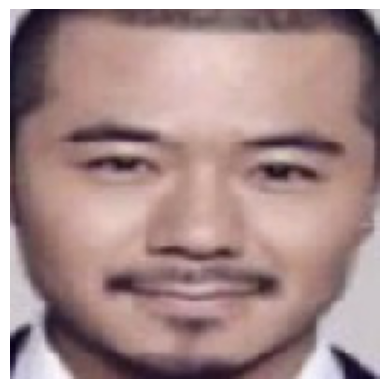

In [32]:
# Load the saved model
model = keras.models.load_model('face_detection_model.h5')

# Load and display the input image
input_image_path = input('Path of the image to be predicted: ')
input_image = image.load_img(input_image_path, target_size=(128, 128))
plt.imshow(input_image)
plt.axis('off')
plt.show()


In [33]:
# Preprocess the input image
input_image_array = image.img_to_array(input_image)
input_image_scaled = input_image_array / 255
input_image_reshaped = input_image_scaled.reshape((1,) + input_image_scaled.shape)

In [34]:
# Make predictions
input_prediction = model.predict(input_image_reshaped)

# Display prediction result
input_pred_label = np.argmax(input_prediction)

# Make predictions on the test set
Y_pred_probs = model.predict(X_test_scaled)
Y_pred = np.argmax(Y_pred_probs, axis=1)
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
# Calculate precision, recall, f1-score, and support
report = classification_report(Y_test, Y_pred, target_names=['Without Mask', 'With Mask'])

# Print the report
print("Classification Report:\n", report)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step
Classification Report:
               precision    recall  f1-score   support

Without Mask       0.95      0.92      0.94       768
   With Mask       0.92      0.95      0.94       743

    accuracy                           0.94      1511
   macro avg       0.94      0.94      0.94      1511
weighted avg       0.94      0.94      0.94      1511

The person in the image is not wearing a mask


In [1]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from PIL import Image



In [2]:
# Load the saved model
model = tf.keras.models.load_model('face_detection_model.h5')

def predict_image(img):
    if img is None:
        return 'No image uploaded'
    # Preprocess the input image
    img = img.resize((128, 128))
    img_array = image.img_to_array(img)
    img_scaled = img_array / 255.0
    img_reshaped = np.expand_dims(img_scaled, axis=0)

    # Make predictions
    prediction = model.predict(img_reshaped)
    pred_label = np.argmax(prediction)

    # Return prediction result
    if pred_label == 1:
        return 'The person in the image is wearing a mask'
    else:
        return 'The person in the image is not wearing a mask'

# Create a Gradio Blocks layout
with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column():
            img_input = gr.Image(type="pil")
            btn_predict = gr.Button("Predict")
        with gr.Column():
            result = gr.Textbox(label="Prediction Result")

    btn_predict.click(fn=predict_image, inputs=img_input, outputs=result)

# Launch the interface with public link
demo.launch(share=True)


Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
